In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
%matplotlib inline
import scipy.stats as stats

In [2]:
# Make a reference to the books.csv file path
csv_path = "LoanStats_2018Q1.csv"

In [3]:
# pull in all csvs and merge them into a single dataframe
bigdf = pd.concat([pd.read_csv(f, low_memory=False, usecols=['grade','earliest_cr_line','tot_cur_bal','loan_amnt','term','int_rate','installment','emp_length','home_ownership','annual_inc','issue_d','loan_status','pymnt_plan','purpose','title','addr_state','dti','delinq_2yrs','mths_since_last_delinq','open_acc','pub_rec','total_rec_late_fee','recoveries','collection_recovery_fee','mths_since_last_major_derog','chargeoff_within_12_mths','delinq_amnt','mo_sin_old_il_acct','mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','mort_acc','mths_since_recent_bc','mths_since_recent_bc_dlq','mths_since_recent_inq','mths_since_recent_revol_delinq','pct_tl_nvr_dlq','pub_rec_bankruptcies','tax_liens'
]) for f in
                    glob.glob('data/LoanStats*.csv')], ignore_index=True)
bigdf

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,...,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens
0,30000.0,36 months,7.34%,930.99,A,3 years,OWN,95000.0,Mar-18,Fully Paid,...,13.0,13.0,0.0,19.0,NaN,24.0,10.0,90.0,0.0,0.0
1,34825.0,60 months,12.61%,785.45,C,2 years,MORTGAGE,125000.0,Mar-18,Current,...,14.0,14.0,1.0,14.0,45.0,15.0,45.0,96.3,0.0,0.0
2,2600.0,36 months,7.96%,81.43,A,3 years,MORTGAGE,62000.0,Mar-18,Current,...,19.0,19.0,1.0,45.0,NaN,NaN,NaN,100.0,0.0,0.0
3,20000.0,60 months,9.92%,424.16,B,3 years,MORTGAGE,110000.0,Mar-18,Current,...,8.0,3.0,5.0,8.0,NaN,4.0,NaN,90.9,0.0,0.0
4,17000.0,60 months,20.39%,454.10,D,10+ years,RENT,52000.0,Mar-18,Current,...,19.0,19.0,0.0,19.0,77.0,0.0,77.0,85.7,0.0,0.0
5,5000.0,36 months,20.39%,186.82,D,8 years,RENT,50000.0,Mar-18,Current,...,11.0,11.0,0.0,11.0,NaN,2.0,NaN,77.8,0.0,0.0
6,20000.0,36 months,10.41%,649.21,B,NaN,MORTGAGE,19000.0,Mar-18,Current,...,0.0,0.0,0.0,24.0,NaN,0.0,NaN,100.0,0.0,0.0
7,19200.0,60 months,17.47%,482.04,D,5 years,RENT,36500.0,Mar-18,Current,...,17.0,17.0,0.0,34.0,NaN,NaN,NaN,83.3,0.0,0.0
8,15000.0,36 months,9.92%,483.45,B,2 years,OWN,196000.0,Mar-18,Current,...,4.0,4.0,5.0,11.0,NaN,6.0,NaN,98.0,0.0,0.0
9,6500.0,36 months,6.07%,197.95,A,10+ years,MORTGAGE,50000.0,Mar-18,In Grace Period,...,21.0,21.0,2.0,21.0,NaN,NaN,NaN,93.8,0.0,0.0


In [4]:
#consol_debtQ1 = pd.read_csv(csv_path, encoding="utf-8", low_memory=False, skipinitialspace=True)
#consol_debtQ1.head()

In [5]:
debt_column = bigdf[["issue_d", "purpose", "addr_state", "earliest_cr_line", "emp_length","annual_inc", "tot_cur_bal",
                            "home_ownership", "int_rate", "grade","pct_tl_nvr_dlq"]]
debt_column.head(50)  



,issue_d,purpose,addr_state,earliest_cr_line,emp_length,annual_inc,tot_cur_bal,home_ownership,int_rate,grade,pct_tl_nvr_dlq
0,Mar-18,house,TX,Oct-09,3 years,95000.0,12704.0,OWN,7.34%,A,90.0
1,Mar-18,credit_card,AZ,Jan-03,2 years,125000.0,68270.0,MORTGAGE,12.61%,C,96.3
2,Mar-18,other,MI,Aug-11,3 years,62000.0,241067.0,MORTGAGE,7.96%,A,100.0
3,Mar-18,home_improvement,VA,Jan-01,3 years,110000.0,365026.0,MORTGAGE,9.92%,B,90.9
4,Mar-18,debt_consolidation,FL,Apr-99,10+ years,52000.0,18039.0,RENT,20.39%,D,85.7
5,Mar-18,other,OK,Jan-09,8 years,50000.0,19344.0,RENT,20.39%,D,77.8
6,Mar-18,debt_consolidation,FL,Oct-87,NaN,19000.0,17709.0,MORTGAGE,10.41%,B,100.0
7,Mar-18,other,CA,Aug-95,5 years,36500.0,13295.0,RENT,17.47%,D,83.3
8,Mar-18,debt_consolidation,FL,Jul-98,2 years,196000.0,534954.0,OWN,9.92%,B,98.0
9,Mar-18,debt_consolidation,OR,Sep-03,10+ years,50000.0,243513.0,MORTGAGE,6.07%,A,93.8


In [6]:
replaceGrades = {
    'A':1
    ,'B':2
    ,'C':3
    ,'D':4
    ,'E':5
    ,'F':6
    ,'G':7
}

In [7]:
replaceGrades

{'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}

In [8]:
bigdf['numericGrade'] = bigdf[['grade']].replace(replaceGrades)
bigdf

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,...,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,numericGrade
0,30000.0,36 months,7.34%,930.99,A,3 years,OWN,95000.0,Mar-18,Fully Paid,...,13.0,0.0,19.0,NaN,24.0,10.0,90.0,0.0,0.0,1.0
1,34825.0,60 months,12.61%,785.45,C,2 years,MORTGAGE,125000.0,Mar-18,Current,...,14.0,1.0,14.0,45.0,15.0,45.0,96.3,0.0,0.0,3.0
2,2600.0,36 months,7.96%,81.43,A,3 years,MORTGAGE,62000.0,Mar-18,Current,...,19.0,1.0,45.0,NaN,NaN,NaN,100.0,0.0,0.0,1.0
3,20000.0,60 months,9.92%,424.16,B,3 years,MORTGAGE,110000.0,Mar-18,Current,...,3.0,5.0,8.0,NaN,4.0,NaN,90.9,0.0,0.0,2.0
4,17000.0,60 months,20.39%,454.10,D,10+ years,RENT,52000.0,Mar-18,Current,...,19.0,0.0,19.0,77.0,0.0,77.0,85.7,0.0,0.0,4.0
5,5000.0,36 months,20.39%,186.82,D,8 years,RENT,50000.0,Mar-18,Current,...,11.0,0.0,11.0,NaN,2.0,NaN,77.8,0.0,0.0,4.0
6,20000.0,36 months,10.41%,649.21,B,NaN,MORTGAGE,19000.0,Mar-18,Current,...,0.0,0.0,24.0,NaN,0.0,NaN,100.0,0.0,0.0,2.0
7,19200.0,60 months,17.47%,482.04,D,5 years,RENT,36500.0,Mar-18,Current,...,17.0,0.0,34.0,NaN,NaN,NaN,83.3,0.0,0.0,4.0
8,15000.0,36 months,9.92%,483.45,B,2 years,OWN,196000.0,Mar-18,Current,...,4.0,5.0,11.0,NaN,6.0,NaN,98.0,0.0,0.0,2.0
9,6500.0,36 months,6.07%,197.95,A,10+ years,MORTGAGE,50000.0,Mar-18,In Grace Period,...,21.0,2.0,21.0,NaN,NaN,NaN,93.8,0.0,0.0,1.0


In [9]:
#debt_column_all["month"] = pd.to_datetime(debt_column_all["issue_d"])
debt_purpose = bigdf['purpose'].value_counts()
debt_purpose
#avg_fare_y = merge_table.groupby(['type', 'city'])['fare'].mean()
#avg_fare_y

debt_consolidation    259642
credit_card           127702
other                  35018
home_improvement       32748
major_purchase         11622
medical                 6622
house                   5430
car                     4979
small_business          4583
vacation                3501
moving                  3115
renewable_energy         275
wedding                    5
Name: purpose, dtype: int64

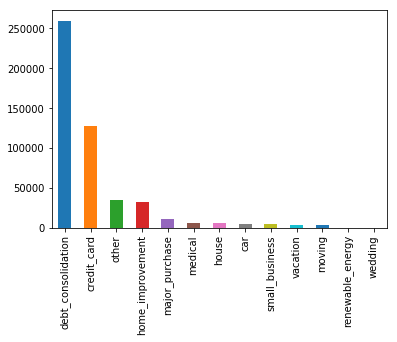

In [10]:
debt_cons1 = debt_purpose.plot.bar()
plt.show()

In [11]:
debt_compare = bigdf.loc[bigdf['purpose'] == "debt_consolidation"]
debt_compare.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,...,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,numericGrade
4,17000.0,60 months,20.39%,454.10,D,10+ years,RENT,52000.0,Mar-18,Current,...,19.0,0.0,19.0,77.0,0.0,77.0,85.7,0.0,0.0,4.0
6,20000.0,36 months,10.41%,649.21,B,NaN,MORTGAGE,19000.0,Mar-18,Current,...,0.0,0.0,24.0,NaN,0.0,NaN,100.0,0.0,0.0,2.0
8,15000.0,36 months,9.92%,483.45,B,2 years,OWN,196000.0,Mar-18,Current,...,4.0,5.0,11.0,NaN,6.0,NaN,98.0,0.0,0.0,2.0
9,6500.0,36 months,6.07%,197.95,A,10+ years,MORTGAGE,50000.0,Mar-18,In Grace Period,...,21.0,2.0,21.0,NaN,NaN,NaN,93.8,0.0,0.0,1.0
13,3200.0,36 months,7.96%,100.22,A,1 year,RENT,42000.0,Mar-18,Current,...,5.0,0.0,5.0,NaN,1.0,NaN,100.0,0.0,0.0,1.0


In [12]:
print(debt_compare["annual_inc"].max())
print(debt_compare["annual_inc"].min())

9930475.0
0.0


In [13]:
print(debt_compare["int_rate"].max())
print(debt_compare["int_rate"].min())

9.93%
10.07%


In [14]:
debt_purpose.dtypes

dtype('int64')

In [15]:
#debt_compare["int_rate"] = pd.to_numeric(debt_compare["int_rate"])
cols = ['int_rate']
debt_compare[cols]=debt_compare[cols].replace('%','', regex=True).apply(pd.to_numeric, errors='coerce')
debt_compare["int_rate"] = debt_compare["int_rate"]
debt_compare.head()

C:\Users\18045\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
C:\Users\18045\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,...,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,numericGrade
4,17000.0,60 months,20.39,454.10,D,10+ years,RENT,52000.0,Mar-18,Current,...,19.0,0.0,19.0,77.0,0.0,77.0,85.7,0.0,0.0,4.0
6,20000.0,36 months,10.41,649.21,B,NaN,MORTGAGE,19000.0,Mar-18,Current,...,0.0,0.0,24.0,NaN,0.0,NaN,100.0,0.0,0.0,2.0
8,15000.0,36 months,9.92,483.45,B,2 years,OWN,196000.0,Mar-18,Current,...,4.0,5.0,11.0,NaN,6.0,NaN,98.0,0.0,0.0,2.0
9,6500.0,36 months,6.07,197.95,A,10+ years,MORTGAGE,50000.0,Mar-18,In Grace Period,...,21.0,2.0,21.0,NaN,NaN,NaN,93.8,0.0,0.0,1.0
13,3200.0,36 months,7.96,100.22,A,1 year,RENT,42000.0,Mar-18,Current,...,5.0,0.0,5.0,NaN,1.0,NaN,100.0,0.0,0.0,1.0


In [16]:
#plt.figure(figsize=(20,5)) 
#plt.scatter(debt_compare['int_rate'], debt_compare['annual_inc'], marker="o", facecolors="blue")
#plt.show()

#plt.figure(figsize=(20,5)) 
#plt.scatter(debt_compare['grade'], debt_compare['pct_tl_nvr_dlq '], marker="o", facecolors="blue")
#plt.show()

In [17]:
home_type1 = debt_compare['int_rate'].value_counts()
home_type1

13.56    7993
15.02    7755
14.47    7101
16.14    6761
11.55    6650
16.91    6488
6.11     6209
7.84     6067
10.47    5637
8.46     5532
12.73    5269
10.08    5103
17.97    4931
18.94    4615
11.06    4447
7.21     4435
19.92    4271
6.67     4002
20.89    3532
11.98    3527
10.90    3387
5.31     3387
12.61    3292
17.47    3290
14.07    3160
18.45    3122
22.35    3108
13.58    3070
9.92     3056
9.43     3012
         ... 
17.09    1186
18.06    1126
25.34    1124
19.03    1124
26.77    1092
20.00    1016
5.32      983
21.45     983
26.31     965
28.72     957
24.37     934
24.84     837
25.81     751
22.90     557
23.87     496
23.88     381
30.79     331
29.69     330
24.85     323
26.30     299
25.82     282
30.17     258
30.75     222
30.65     204
22.91     163
6.00       40
30.89      27
30.84      25
30.94      14
30.99       9
Name: int_rate, Length: 110, dtype: int64

In [18]:
#Pie Chart
home_type = debt_compare['home_ownership'].value_counts()
home_type

MORTGAGE    126282
RENT        103628
OWN          29474
ANY            258
Name: home_ownership, dtype: int64

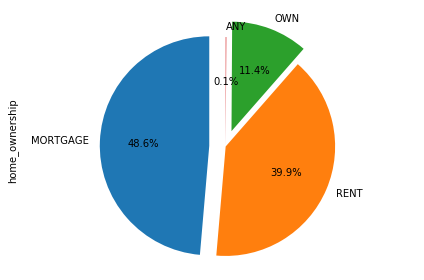

In [19]:
home_type.plot.pie(
           shadow=False,
           explode=(0.15, 0, 0.15, 0),   
           startangle=90,
           autopct='%1.1f%%')

plt.axis('equal')
plt.tight_layout()
plt.show()

In [20]:
region_debt1 = debt_compare['home_ownership'].value_counts()
region_debt1

MORTGAGE    126282
RENT        103628
OWN          29474
ANY            258
Name: home_ownership, dtype: int64

In [21]:
region_debt = debt_compare['addr_state'].value_counts()
region_debt

CA    35247
TX    21394
NY    19498
FL    19364
IL    10017
NJ     9273
GA     8762
OH     8384
PA     8314
NC     7393
VA     7029
MI     6628
AZ     6407
MD     6388
MA     5949
CO     5864
WA     5476
TN     4401
IN     4366
MN     4245
CT     4209
MO     4194
NV     3990
SC     3517
WI     3392
OR     3277
AL     3111
LA     2646
KY     2511
OK     2391
KS     2086
AR     1933
UT     1740
MS     1731
WV     1534
NM     1356
NH     1330
NE     1292
RI     1242
HI     1184
ID      980
ME      855
DE      792
MT      715
VT      604
AK      566
ND      553
SD      524
WY      523
DC      465
Name: addr_state, dtype: int64

In [22]:
#Region 1: Northeast
#Division 1: New England (Connecticut, Maine, Massachusetts, New Hampshire, Rhode Island, and Vermont)
#Division 2: Mid-Atlantic (New Jersey, New York, and Pennsylvania)

#newdf = debt_compare[debt_compare["addr_state"] == "CA"]
#newdf
north_east = ["CT", "ME", "MA", "NH", "RI", "VT", "NJ", "NY", "PA"]
north_east 

['CT', 'ME', 'MA', 'NH', 'RI', 'VT', 'NJ', 'NY', 'PA']

In [23]:
#Region 2: Midwest (Prior to June 1984, the Midwest Region was designated as the North Central Region
#Division 3: East North Central (Illinois, Indiana, Michigan, Ohio, and Wisconsin)
#Division 4: West North Central (Iowa, Kansas, Minnesota, Missouri, Nebraska, North Dakota, and South Dakota)
mid_west = ["IL", "IN", "MI", "OH", "WI", "IA", "KS", "MN", "MO", "NE", "ND", "SD",]
mid_west


['IL', 'IN', 'MI', 'OH', 'WI', 'IA', 'KS', 'MN', 'MO', 'NE', 'ND', 'SD']

In [24]:
#Region 3: South
#Division 5: South Atlantic (Delaware, Florida, Georgia, Maryland, North Carolina, South Carolina, Virginia, District of Columbia, and West Virginia)
#Division 6: East South Central (Alabama, Kentucky, Mississippi, and Tennessee)
#Division 7: West South Central (Arkansas, Louisiana, Oklahoma, and Texas)

south = ["DE", "FL", "GA", "MD", "NC", "SC", "VA", "DC", "WV", "AL", "KY", "MS", "TN", "AR", "LA", "OK", "TX"]
south
    

['DE',
 'FL',
 'GA',
 'MD',
 'NC',
 'SC',
 'VA',
 'DC',
 'WV',
 'AL',
 'KY',
 'MS',
 'TN',
 'AR',
 'LA',
 'OK',
 'TX']

In [25]:
#Region 4: West
#Division 8: Mountain (Arizona, Colorado, Idaho, Montana, Nevada, New Mexico, Utah, and Wyoming)
#Division 9: Pacific (Alaska, California, Hawaii, Oregon, and Washington)
west =  ["AZ", "CO", "ID", "MT", "NV", "NM", "UT", "WY", "AK", "CA", "HI", "OR", "WA"]
west 

['AZ', 'CO', 'ID', 'MT', 'NV', 'NM', 'UT', 'WY', 'AK', 'CA', 'HI', 'OR', 'WA']

In [26]:
# #create new columns
# debt_compare["north_east"] = debt_compare["addr_state"] .isin (north_east)
# debt_compare

# debt_compare["mid_west"] = debt_compare["addr_state"] .isin (mid_west)
# debt_compare

# debt_compare["south"] = debt_compare["addr_state"] .isin (south)
# debt_compare

# debt_compare["west"] = debt_compare["addr_state"] .isin (west)
# debt_compare
def addRegion(addr_state):
    if addr_state in north_east:
        return 'Northeast'
    if addr_state in mid_west:
        return 'Midwest'
    if addr_state in south:
        return 'South'
    if addr_state in west:
        return 'West'
    
debt_compare['Region'] = debt_compare.addr_state.apply(addRegion)


C:\Users\18045\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [27]:
debt_compare

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,...,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,numericGrade,Region
4,17000.0,60 months,20.39,454.10,D,10+ years,RENT,52000.00,Mar-18,Current,...,0.0,19.0,77.0,0.0,77.0,85.7,0.0,0.0,4.0,South
6,20000.0,36 months,10.41,649.21,B,NaN,MORTGAGE,19000.00,Mar-18,Current,...,0.0,24.0,NaN,0.0,NaN,100.0,0.0,0.0,2.0,South
8,15000.0,36 months,9.92,483.45,B,2 years,OWN,196000.00,Mar-18,Current,...,5.0,11.0,NaN,6.0,NaN,98.0,0.0,0.0,2.0,South
9,6500.0,36 months,6.07,197.95,A,10+ years,MORTGAGE,50000.00,Mar-18,In Grace Period,...,2.0,21.0,NaN,NaN,NaN,93.8,0.0,0.0,1.0,West
13,3200.0,36 months,7.96,100.22,A,1 year,RENT,42000.00,Mar-18,Current,...,0.0,5.0,NaN,1.0,NaN,100.0,0.0,0.0,1.0,Northeast
14,3000.0,36 months,11.98,99.62,B,10+ years,OWN,52000.00,Mar-18,Current,...,2.0,NaN,NaN,14.0,NaN,100.0,0.0,0.0,2.0,Northeast
16,17000.0,36 months,10.90,555.76,B,10+ years,OWN,70000.00,Mar-18,Charged Off,...,0.0,11.0,NaN,21.0,NaN,100.0,0.0,0.0,2.0,West
17,34000.0,60 months,10.41,729.28,B,2 years,RENT,105000.00,Mar-18,Current,...,0.0,5.0,NaN,12.0,NaN,100.0,0.0,0.0,2.0,West
20,3000.0,36 months,9.43,96.01,B,10+ years,RENT,97000.00,Mar-18,Current,...,1.0,193.0,33.0,NaN,33.0,70.0,0.0,0.0,2.0,West
22,10000.0,36 months,9.43,320.01,B,10+ years,MORTGAGE,65000.00,Mar-18,Current,...,1.0,7.0,NaN,3.0,NaN,88.9,0.0,0.0,2.0,Northeast


In [28]:
def get_region (row):
    for column in ["south", "north_east", "mid_west", "west"]:
        if row[column]:
            return column

In [29]:
debt_compare

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,...,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,numericGrade,Region
4,17000.0,60 months,20.39,454.10,D,10+ years,RENT,52000.00,Mar-18,Current,...,0.0,19.0,77.0,0.0,77.0,85.7,0.0,0.0,4.0,South
6,20000.0,36 months,10.41,649.21,B,NaN,MORTGAGE,19000.00,Mar-18,Current,...,0.0,24.0,NaN,0.0,NaN,100.0,0.0,0.0,2.0,South
8,15000.0,36 months,9.92,483.45,B,2 years,OWN,196000.00,Mar-18,Current,...,5.0,11.0,NaN,6.0,NaN,98.0,0.0,0.0,2.0,South
9,6500.0,36 months,6.07,197.95,A,10+ years,MORTGAGE,50000.00,Mar-18,In Grace Period,...,2.0,21.0,NaN,NaN,NaN,93.8,0.0,0.0,1.0,West
13,3200.0,36 months,7.96,100.22,A,1 year,RENT,42000.00,Mar-18,Current,...,0.0,5.0,NaN,1.0,NaN,100.0,0.0,0.0,1.0,Northeast
14,3000.0,36 months,11.98,99.62,B,10+ years,OWN,52000.00,Mar-18,Current,...,2.0,NaN,NaN,14.0,NaN,100.0,0.0,0.0,2.0,Northeast
16,17000.0,36 months,10.90,555.76,B,10+ years,OWN,70000.00,Mar-18,Charged Off,...,0.0,11.0,NaN,21.0,NaN,100.0,0.0,0.0,2.0,West
17,34000.0,60 months,10.41,729.28,B,2 years,RENT,105000.00,Mar-18,Current,...,0.0,5.0,NaN,12.0,NaN,100.0,0.0,0.0,2.0,West
20,3000.0,36 months,9.43,96.01,B,10+ years,RENT,97000.00,Mar-18,Current,...,1.0,193.0,33.0,NaN,33.0,70.0,0.0,0.0,2.0,West
22,10000.0,36 months,9.43,320.01,B,10+ years,MORTGAGE,65000.00,Mar-18,Current,...,1.0,7.0,NaN,3.0,NaN,88.9,0.0,0.0,2.0,Northeast


In [30]:
plot_series = pd.Series([west_count, south_count, mid_west_count, north_east_count], 
                        index=["West", "South", "Mid-West", "North-East"]) 
plot_series

NameError: name 'west_count' is not defined

In [ ]:
plot_series.plot.pie(
           shadow=False,
           explode=(0, 0.15, 0, 0),   
           startangle=90,
           autopct='%1.1f%%')

plt.axis('equal')
plt.tight_layout()
plt.show()

In [31]:
#Create new column
newdf = pd.DataFrame([('West', 67325),
                   ('South', 95362),
                   ('Mid-West', 45681),
                  ('North-East', 51274)],
                 index=['West', 'South', 'Mid-West', 'North-East'],
                 columns=('Region', 'Total Borrowers'))
newdf

,Region,Total Borrowers
West,West,67325
South,South,95362
Mid-West,Mid-West,45681
North-East,North-East,51274


In [32]:
#debt_compare[debt_compare['home_ownership']== ['loan_amnt'].mean()

In [33]:
#debt_compare[debt_compare['Region']=='Northeast'].mean()

In [34]:
#bigdf.boxplot("annual_inc", by="addr_state", figsize=(25, 10))

In [35]:
#bigdf['debt_c1'] = bigdf['purpose'] == "debt_consolidation"
#bigdf['Region'] = bigdf.addr_state.apply(addRegion)
def addRegion(addr_state):
    if addr_state in north_east:
        return 'Northeast'
    if addr_state in mid_west:
        return 'Midwest'
    if addr_state in south:
        return 'South'
    if addr_state in west:
        return 'West'
    
debt_compare['Region'] = debt_compare.addr_state.apply(addRegion)


C:\Users\18045\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [36]:
#bigdf.boxplot("loan_amnt", by="debt_c1", figsize=(25, 10))

In [37]:
replaceGrades

{'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}

In [38]:
#home_type1 = debt_compare['int_rate'].value_counts()
#home_type1

In [39]:
replaceGrades = {'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7}
replaceGrades

{'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}

In [40]:
newdf2 = pd.DataFrame([('A', 1),
                   ('B', 2),
                   ('C', 3),
                   ('D', 4),
                   ('E', 5),
                   ('F', 6),
                   ('G',7)],
                 index=['A', 'B', 'C', 'D', 'E','F','G'],
                 columns=('Grade', 'Number'))
newdf2

,Grade,Number
A,A,1
B,B,2
C,C,3
D,D,4
E,E,5
F,F,6
G,G,7


In [41]:
newdf2.columns

Index(['Grade', 'Number'], dtype='object')

In [42]:
newdf2.dtypes

Grade     object
Number     int64
dtype: object

In [43]:
debt_compare['numericGrade'].value_counts()

2.0    72661
3.0    71138
1.0    61704
4.0    40487
5.0    11274
6.0     1972
7.0      406
Name: numericGrade, dtype: int64

In [44]:
debt_compare['int_rate'].value_counts()

13.56    7993
15.02    7755
14.47    7101
16.14    6761
11.55    6650
16.91    6488
6.11     6209
7.84     6067
10.47    5637
8.46     5532
12.73    5269
10.08    5103
17.97    4931
18.94    4615
11.06    4447
7.21     4435
19.92    4271
6.67     4002
20.89    3532
11.98    3527
10.90    3387
5.31     3387
12.61    3292
17.47    3290
14.07    3160
18.45    3122
22.35    3108
13.58    3070
9.92     3056
9.43     3012
         ... 
17.09    1186
18.06    1126
25.34    1124
19.03    1124
26.77    1092
20.00    1016
5.32      983
21.45     983
26.31     965
28.72     957
24.37     934
24.84     837
25.81     751
22.90     557
23.87     496
23.88     381
30.79     331
29.69     330
24.85     323
26.30     299
25.82     282
30.17     258
30.75     222
30.65     204
22.91     163
6.00       40
30.89      27
30.84      25
30.94      14
30.99       9
Name: int_rate, Length: 110, dtype: int64

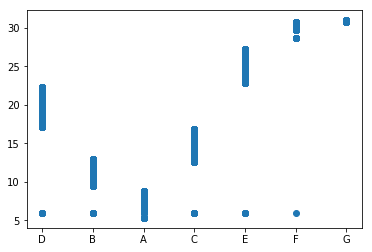

In [48]:
#Direct Correlation between interest rate and Grade Score
plt.scatter(debt_compare['grade'], debt_compare['int_rate'])
plt.show()

In [63]:
#Why does a person with a grade of E get such a low interest rate?  
#How are people graded? It is based on credit risk (monthly recurring debts divided by the gross monthly income.)
#debt_compare.loc[(debt_compare['int_rate'] < 7) & (debt_compare['grade'] == 'E')]
#debt_compare.loc[(debt_compare['int_rate'] < 7) & (debt_compare['grade'] == 'A')]

In [66]:
debt_compare.loc[(debt_compare['int_rate'] < 7) & (debt_compare['grade'] == 'A')]["loan_amnt"].value_counts(normalize=True)
debt_compare.loc[(debt_compare['int_rate'] < 7) & (debt_compare['grade'] == 'E')]["loan_amnt"].max()

30000.0